**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
#importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [3]:
books.shape
#There are 271360 records and 8 features

(271360, 8)

In [4]:
users.shape
#There are 278858 records and 3 features

(278858, 3)

In [5]:
ratings.shape
#There are 1149780 records and 3 features

(1149780, 3)

In [6]:
books.info()
#books data has all not null object variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
users.info()
#users data has all not null int, float and object variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
ratings.info()
#ratings dataframe has int and object not null variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [9]:
books.head()
#having a look at dataframe

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [131]:
books.describe()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,085030069X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/225303956X.0...,http://images.amazon.com/images/P/044022103X.0...
freq,1,27,632,13903,7535,2,2,2


### Drop last three columns containing image URLs which will not be required for analysis

In [10]:
#dropping the not meaningful values from the dataframe
books.drop(['imageUrlS','imageUrlM','imageUrlL'] , inplace = True, axis = 1)

In [11]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [12]:
#checking for unique values of yearOfPublication
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [13]:
#checking for the rows having DKpublishing Inc as yearOfPublication
books.loc[(books['yearOfPublication'] =='DK Publishing Inc')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [14]:
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,8823003083,1
bookTitle,271360,242135,Selected Poems,27
bookAuthor,271359,102023,Agatha Christie,632
yearOfPublication,271360,202,2002,13903
publisher,271358,16807,Harlequin,7535


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [15]:
#droping the string values from years of publication
books = books.loc[~(books['yearOfPublication'] =='Gallimard') & ~(books['yearOfPublication'] =='DK Publishing Inc')]

In [16]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [17]:
#verifying after removing the string values
books.loc[(books['yearOfPublication'] =='DK Publishing Inc')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [18]:
books.loc[(books['yearOfPublication'] =='Gallimard')]


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


The string values in yearofpublication are removed

### Change the datatype of yearOfPublication to 'int'

In [19]:
#chanding the datatype of yearofpublication to int
books['yearOfPublication'] = books['yearOfPublication'].astype("int")

In [20]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [21]:
#checking for null values in publisher column
books['publisher'].isna().sum()

2

There are two null values and dropping those values from publisher column of books dataset

In [22]:
books['publisher'].dropna(inplace = True)

In [23]:
#Verifying after dropping null values
books['publisher'].isna().sum()

0

The null values are removed

## Exploring Users dataset

In [24]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [26]:
#checking for unique values in age columns
ageunique = users['Age'].unique()

In [27]:
ageunique 

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

In [28]:
#sorting then in ascending order
ageunique.sort()
print(ageunique)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


In [29]:
users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [151]:
users['Location'].isna().sum()

0

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [30]:
users['Age'].mask(((users['Age'] < 5 ) & ( users['Age'] > 9 )), inplace = True)

In [31]:
users['Age'].isna().sum()

110762

In [32]:
users['Age'].sample(200)

45925      28.0
48781       NaN
211678     30.0
95180      20.0
218599    103.0
          ...  
62505      21.0
52497       NaN
32789      48.0
164708      NaN
29982       NaN
Name: Age, Length: 200, dtype: float64

### Replace null values in column `Age` with mean

In [33]:
import numpy as np
#replacing null values with mean value of the age column
meanuser = users['Age'].mean()
print(meanuser)
users['Age'] = users['Age'].replace(np.NaN , meanuser)

34.75143370454978


In [34]:
users['Age'].isna().sum()

0

### Change the datatype of `Age` to `int`

In [36]:
#converting age to int
users['Age'] = users['Age'].astype("int")

In [37]:
print(sorted(users['Age'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 123, 124, 127, 128, 132, 133, 136, 137, 138, 140, 141, 143, 146, 147, 148, 151, 152, 156, 157, 159, 162, 168, 172, 175, 183, 186, 189, 199, 200, 201, 204, 207, 208, 209, 210, 212, 219, 220, 223, 226, 228, 229, 230, 231, 237, 239, 244]


## Exploring the Ratings Dataset

### check the shape

In [38]:
ratings.shape
#shape of the ratings dataset

(1149780, 3)

In [39]:
n_users = users.shape[0]
n_books = books.shape[0]
n_users

278858

In [161]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [162]:
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [41]:
#ratings containg books that only exist in books dataset
ratingsnew = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [42]:
ratingsnew.shape
#the shape after modifying dataframe with values contained in books dataframe

(1031132, 3)

In [43]:
ratings.shape

(1149780, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [44]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
5,6,"santa monica, california, usa",61
6,7,"washington, dc, usa",34
7,8,"timmins, ontario, canada",34
8,9,"germantown, tennessee, usa",34
9,10,"albacete, wisconsin, spain",26


In [45]:
#Ratings which have been given by users from users dataframe
modratings  = ratingsnew[ratingsnew['userID'].isin(users['userID'])]

In [46]:
#verifying shape of new users data after dropping rows
modratings.shape

(1031132, 3)

In [47]:
modratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [48]:
#considerign ratings from 1 -10 and leaving zero ratings
modratings.sort_values(by='bookRating', ascending = True)

,userID,ISBN,bookRating
0,276725,034545104X,0
689121,167800,0525215468,0
689122,167800,0525447075,0
689123,167800,0531059820,0
689124,167800,0553095404,0
...,...,...,...
551921,132492,3716510874,10
895513,216576,076073030X,10
48544,11676,0380803739,10
895492,216557,1563410591,10


In [49]:
#veryifn unique values of ratings
sorted(modratings['bookRating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [51]:
#checking for rating with zero ratings
modratings.loc[modratings['bookRating']==0]

,userID,ISBN,bookRating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


647291 rows has to be dropped as it has zero ratings

In [52]:
#drop ratings with value as zero
modratings = modratings.loc[~(modratings['bookRating'] == 0)]

In [53]:
modratings.shape

(383841, 3)

In [54]:
#verifying if there are bookrating with zero
modratings.loc[(modratings['bookRating'] == 0)]

,userID,ISBN,bookRating


size of the ratings dataset after removing zero ratings is 383841 rows and 3 features . Now there are no ratings with zero value

### Find out which rating has been given highest number of times

In [55]:
modratings['bookRating'].mode()

0    8
dtype: int64

In [57]:
#8 has been given highest number of times
modratings['bookRating'].value_counts()

8     91804
10    71225
7     66401
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

rating 8 has occured highest number of times

In [58]:
#verifying the count by group by function
modratings.groupby('bookRating').count()

,userID,ISBN
bookRating,,
1,1481,1481
2,2375,2375
3,5118,5118
4,7617,7617
5,45355,45355
6,31687,31687
7,66401,66401
8,91804,91804
9,60778,60778


From the above we can infer that rating 8 has repeated most number of times we can verify the same with count plots

In [59]:
import seaborn as sns

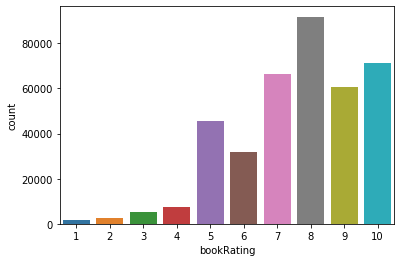

In [60]:
sns.countplot(data = modratings , x ='bookRating')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [61]:
modratings.head(5)

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [182]:
value = modratings.groupby(['userID']).sum() > 100
value

,bookRating
userID,
8,False
9,False
12,False
14,False
16,False
...,...
278846,False
278849,False
278851,False


In [183]:
modratings.shape
#before filtering the shape is

(383841, 3)

In [62]:
#after filtering the shape is
modratings1 = modratings[modratings['userID'].map(modratings['userID'].value_counts() >= 100)]
modratings1.shape

(103271, 3)

In [63]:
#verifying the dataframe after filtering
modratings1.groupby(['userID']).sum()
#we could observe that users has rated more than 100 books


,bookRating
userID,
2033,1125
2110,853
2276,1639
4017,1380
4385,2064
...,...
274061,2056
274301,1422
275970,1201


In [64]:
#the other way of doing it
modratings.groupby("userID").filter(lambda x: len(x) >= 100)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


In [65]:
#since the second method is time consuming using the results obtained from first method

In [66]:
modratings.shape

(383841, 3)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [189]:
modratings1.head(10)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
1477,277427,0062507109,8
1483,277427,0132220598,8
1488,277427,0140283374,6
1490,277427,014039026X,8
1491,277427,0140390715,7


In [67]:
#checking the pivot matrix
modratings1.pivot(index='userID', columns='ISBN',values='bookRating')

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#replacing Nan with zeros
ratings_matrix = modratings1.pivot(index='userID', columns='ISBN',values='bookRating').fillna(0)

In [69]:
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
ratings_matrix.shape

(449, 66574)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [71]:
from scipy.sparse.linalg import svds

In [72]:
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [73]:
U

array([[-0.02872564,  0.00276873, -0.00163466, ...,  0.00468385,
         0.00146397,  0.0011523 ],
       [-0.00316011,  0.0028087 , -0.00656475, ...,  0.0010617 ,
         0.00106811,  0.00048139],
       [ 0.02266218,  0.00362386,  0.00392217, ...,  0.00025669,
         0.00291003,  0.00198013],
       ...,
       [ 0.01809825, -0.00283073,  0.01413335, ...,  0.00053467,
         0.0042156 ,  0.00171409],
       [ 0.01331752, -0.0038979 ,  0.00813848, ...,  0.0010925 ,
         0.00485901,  0.00238028],
       [-0.00396589, -0.00564166,  0.00528427, ...,  0.00287073,
         0.00101087,  0.00069119]])

In [74]:
sigma = np.diag(sigma)

In [75]:
Vt

array([[-3.92054037e-04, -1.12886218e-03, -7.52574787e-04, ...,
         1.21259161e-04,  1.40728301e-03, -9.39263824e-04],
       [ 1.83828525e-04,  8.04404542e-05,  5.36269695e-05, ...,
        -2.03631122e-05, -1.13175955e-05,  8.89772090e-05],
       [-6.45218880e-04, -1.81915433e-04, -1.21276956e-04, ...,
         6.52660888e-05,  5.77568724e-05, -2.03721181e-03],
       ...,
       [ 9.70989480e-05,  8.85060144e-05,  5.90040096e-05, ...,
         9.93817304e-07, -1.57026694e-06,  1.95172285e-04],
       [ 1.24407689e-04,  1.40140908e-04,  9.34272721e-05, ...,
         6.42577921e-06,  3.12228746e-05,  1.36623757e-04],
       [ 5.26801674e-05,  4.49929631e-05,  2.99953088e-05, ...,
         1.97748096e-06,  9.58362806e-06,  4.81840845e-05]])

In [76]:
sigma

array([[147.92121923,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34383594,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07402888, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58353138,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.74439146,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.41331629]])

In [77]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [78]:
all_users_predicted_ratings

array([[ 2.53413475e-02, -2.14620512e-03, -1.43080341e-03, ...,
         1.19754552e-04, -1.69337072e-03,  6.75033030e-02],
       [-1.00123141e-02, -3.66944054e-03, -2.44629370e-03, ...,
        -2.41938596e-04,  2.91513037e-05, -1.30588567e-02],
       [-1.50543603e-02, -1.54565955e-02, -1.03043970e-02, ...,
        -3.03638619e-04,  9.00886855e-03, -5.76922527e-02],
       ...,
       [ 3.81433077e-03, -1.11407898e-02, -7.42719319e-03, ...,
         1.74016665e-03,  8.52624925e-03,  1.26062037e-01],
       [ 7.80204945e-02, -2.44385596e-02, -1.62923730e-02, ...,
         3.02174867e-04,  1.01777194e-02,  3.59761833e-02],
       [ 8.05621605e-03,  1.16247532e-02,  7.74983548e-03, ...,
         8.58235138e-05, -3.24034800e-04,  7.47563173e-03]])

In [79]:
prediction_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)

In [80]:
prediction_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080027,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673458,0.002591,-0.008229,0.001413,0.004918,0.047773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,-0.013295,-0.002811,-0.001874,-0.002811,-0.002811,-0.023810,0.250609,0.005716,0.005716,-0.028896,...,0.001848,-0.007856,0.062855,-0.001133,0.128214,-0.020683,0.007356,0.001232,-0.024207,0.100999
445,0.017231,0.020953,0.013969,0.020953,0.020953,0.016303,0.045661,0.017187,0.017187,0.009598,...,-0.002726,0.002173,0.238855,-0.003137,0.058286,0.014197,0.010563,-0.001817,0.008224,-0.071487
446,0.003814,-0.011141,-0.007427,-0.011141,-0.011141,0.007776,-0.012431,0.005990,0.005990,0.022312,...,0.002610,0.003690,0.015291,0.021539,-0.051916,0.008105,0.005769,0.001740,0.008526,0.126062
447,0.078020,-0.024439,-0.016292,-0.024439,-0.024439,0.011760,-0.018174,-0.005821,-0.005821,0.027238,...,0.000453,0.003468,0.060661,0.010400,-0.074412,0.012083,0.008547,0.000302,0.010178,0.035976


In [81]:
prediction_df.index

RangeIndex(start=0, stop=449, step=1)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [82]:
userID = 2110

In [83]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

In [84]:
books.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [85]:
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18


In [86]:
ratings.head(2)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5


In [88]:
def recommend_books(predictions,user_id, userID, books, ratings):
    user_row_number = user_id - 1 #UserID starts at zero not 1
    sorted_user_predictions = predictions.loc[user_row_number].sort_values(ascending = False)
    #print(predictions.loc[user_row_number])
    #print(sorted_user_predictions)
    
    user_data = ratings[ratings.userID == (userID)]
    #print(user_data)
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    
    
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False))
                      #iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data, user_full

In [89]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(prediction_df,user_id, userID, books, modratings1)

User 2110 has already rated 103 books.


In [90]:
#checking the recommendations for user 2110
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,0.368945
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,0.333624
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.333209
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.329336
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,0.313295
...,...,...,...,...,...,...
271249,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),NaN
271250,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,NaN
271251,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,NaN
271252,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,NaN


### Get the predicted ratings for userID `2110` and sort them in descending order

In [91]:
# predicted rating for userid sorted in ascending order
predictions.sort_values(by = 'Predictions',ascending = False)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,0.368945
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,0.333624
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.333209
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.329336
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,0.313295
...,...,...,...,...,...,...
271249,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),NaN
271250,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,NaN
271251,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,NaN
271252,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,NaN


In [92]:
sorted_user_predictions

ISBN
059035342X    0.682443
0345370775    0.368945
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
                ...   
0671744577   -0.056397
0399141383   -0.057334
0553569783   -0.060981
0515127833   -0.061348
0553561618   -0.067188
Name: 1, Length: 66574, dtype: float64

In [93]:
#already predicted data by user 2110 which is sorted in descending order

In [94]:
already_rated

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988,Audioworks
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996,Scholastic
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994,Scholastic
...,...,...,...,...,...,...,...
49,2110,0515134384,5,The Cat Who Went Up the Creek,Lilian Jackson Braun,2003,Jove Books
19,2110,037361490X,5,Age of War (Super Bolan #90),Don Pendleton,2003,Gold Eagle
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt
50,2110,0515136557,3,The Cat Who Brought Down the House,Lilian Jackson Braun,2004,Jove Books


In [95]:
already_rated.shape

(103, 7)

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [96]:
#forming user_data with explicity interacted books
user_data = modratings1.loc[modratings1['userID'] == 2110]

In [97]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [98]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [99]:
#forming book data corresponding to the ones rated by user 2110
book_data = books.loc[(books['ISBN'].isin(user_data['ISBN']))]

In [100]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [101]:
user_full_info = user_data.merge(book_data)

In [103]:
user_full_info.head()
#the user info containing user and book data is which have been already rated by user 2110

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [109]:
#The top 10 recommendations for given userID
predictions.sort_values(by='Predictions',ascending = False).head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,0.368945
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,0.333624
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.333209
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.329336
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,0.313295
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,0.305088
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,0.290587
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos,0.278563
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books,0.250941
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book,0.249253


We could see the user has given high ratings to adventerous genere and the recommendations also predicting the same

In [110]:
#verifying the results with other user id
userID = 4385
user_id = 5 

In [111]:
already_rated1, predictions1, sorted_user_predictions1, user_data1, user_full1 = recommend_books(prediction_df,user_id, userID, books, modratings1)

User 4385 has already rated 212 books.


In [112]:
predictions.sort_values(by='Predictions', ascending = False).head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,0.368945
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,0.333624
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.333209
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.329336
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,0.313295
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,0.305088
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,0.290587
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos,0.278563
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books,0.250941
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book,0.249253
